# Project: TMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The 'TMDb movie' dataset that we will be analyzing contains informations about 10,000 movies, including users ratings and revenue. We would be using it to answer the following questions:
>> <ol><li>What's the most popular genre?</li><li>What's the most profitable genre?</li><li> Is there a relationship between a genre  popularity and profitability?</li></ol>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn import preprocessing as prp

<a id='wrangling'></a>
## Data Wrangling

### General Properties

**First let's load our data...** 

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

**...Alright! Now we should investigate the data:**

In [3]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
df.shape

(10866, 21)

We can see that we have a dataset composed of 10866 rows and 21 columns, prior to go deeper into our danalysis process, we should drop the columns irrelevant for analysis. 

In [5]:
df.drop(['id', 'imdb_id','cast','homepage','tagline','overview','runtime','release_date', 'keywords', 'production_companies'], axis=1, inplace=True)

In [6]:
df.shape

(10866, 11)

In [7]:
df.head(3)

,popularity,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08


**Let's look at the summary statistics:**

In [8]:
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 933.9+ KB


There are missing data in the 'director' and 'genres' columns. The former could be dropped, however the latter is very important for our analysis, we should therefore only eleminate the rows with missing data for that one.

In [10]:
df.drop(['director'], axis=1, inplace=True)
df.shape

(10866, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 849.0+ KB


In [12]:
df.dropna(inplace=True)
df.shape

(10843, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
genres            10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
budget_adj        10843 non-null float64
revenue_adj       10843 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 931.8+ KB


We will now check for duplicate rows in our dataset and remove them:

In [14]:
duplicate_rows = sum(df.duplicated())
duplicate_rows

1

Apparently we have only one duplicate row, so let's go ahead and drop it:

In [15]:
df.drop_duplicates(inplace=True)
df.shape

(10842, 10)

We can see that we have one missing row in the dataset, which confirm the duplicate row has been properly deleted. Now with our cleaned dataset, let's start exploring our data!

In [16]:
df.head()

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What's the most popular genre?

In order to answer that question, we will look for the genre with the highest popularity rating. When we look at the 'genres' column we can see that we have mostly a combination of genres for each movie. Therefore, we should seek to find each and every distinct genres enumerated in the dataset and explore them one by one.
First of all, let's determine all the genres in the dataset:

In [17]:
# We create a list of all combinations of genres per movie
genres = list(map(str, df['genres']))

# We split all the combinations to create a list of all distinct 'genres' per movie
genre = []
for x in genres:
    genres_split = list(map(str, x.split('|')))
    
# We derive the list of all the distinct genres present in the dataset
    for j in genres_split:
        if j not in genre:
            genre.append(j)

genre

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Foreign']

Now, we create a subset dataframe containing the movies' title, popularity and genres:

In [18]:
movie_popularity = df[['original_title','popularity','genres']]
movie_popularity.head()

,original_title,popularity,genres
0,Jurassic World,32.985763,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,28.419936,Action|Adventure|Science Fiction|Thriller
2,Insurgent,13.112507,Adventure|Science Fiction|Thriller
3,Star Wars: The Force Awakens,11.173104,Action|Adventure|Science Fiction|Fantasy
4,Furious 7,9.335014,Action|Crime|Thriller


We create another dataframe with a column for each genre: 

In [19]:
genre_df = pd.DataFrame(index=range(0, 10842), columns=genre).fillna(0)
genre_df.head()

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We append 'genre_df' columns to 'movie_popularity': 

In [20]:
movie_popularity = pd.concat([movie_popularity, genre_df], axis=1, join_axes=[movie_popularity.index])
movie_popularity.head()

,original_title,popularity,genres,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,Jurassic World,32.985763,Action|Adventure|Science Fiction|Thriller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mad Max: Fury Road,28.419936,Action|Adventure|Science Fiction|Thriller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Insurgent,13.112507,Adventure|Science Fiction|Thriller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Star Wars: The Force Awakens,11.173104,Action|Adventure|Science Fiction|Fantasy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Furious 7,9.335014,Action|Crime|Thriller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We put 1 in each cell of each genre column whenever a movie is of this genre, this will then allows us to count the number of movie per genre in the data set: 

In [21]:
for i in genre:
    movie_popularity[i] = movie_popularity['genres'].str.contains(i).apply(lambda x: 1 if x else 0)
movie_popularity.head()

,original_title,popularity,genres,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,Jurassic World,32.985763,Action|Adventure|Science Fiction|Thriller,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mad Max: Fury Road,28.419936,Action|Adventure|Science Fiction|Thriller,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Insurgent,13.112507,Adventure|Science Fiction|Thriller,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Star Wars: The Force Awakens,11.173104,Action|Adventure|Science Fiction|Fantasy,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Furious 7,9.335014,Action|Crime|Thriller,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
moviePerGenre = movie_popularity[genre]
moviePerGenre.head()

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
NumMoviePerGenre = []
for i in genre:
    NumMoviePerGenre.append(moviePerGenre[i][moviePerGenre[i] == 1].sum())
NumMoviePerGenre = np.array(NumMoviePerGenre)
dfMovieGenre = pd.DataFrame({'genre':genre,'movies':NumMoviePerGenre})
dfMovieGenre.head()

,genre,movies
0,Action,2384
1,Adventure,1471
2,Science Fiction,1229
3,Thriller,2907
4,Fantasy,916


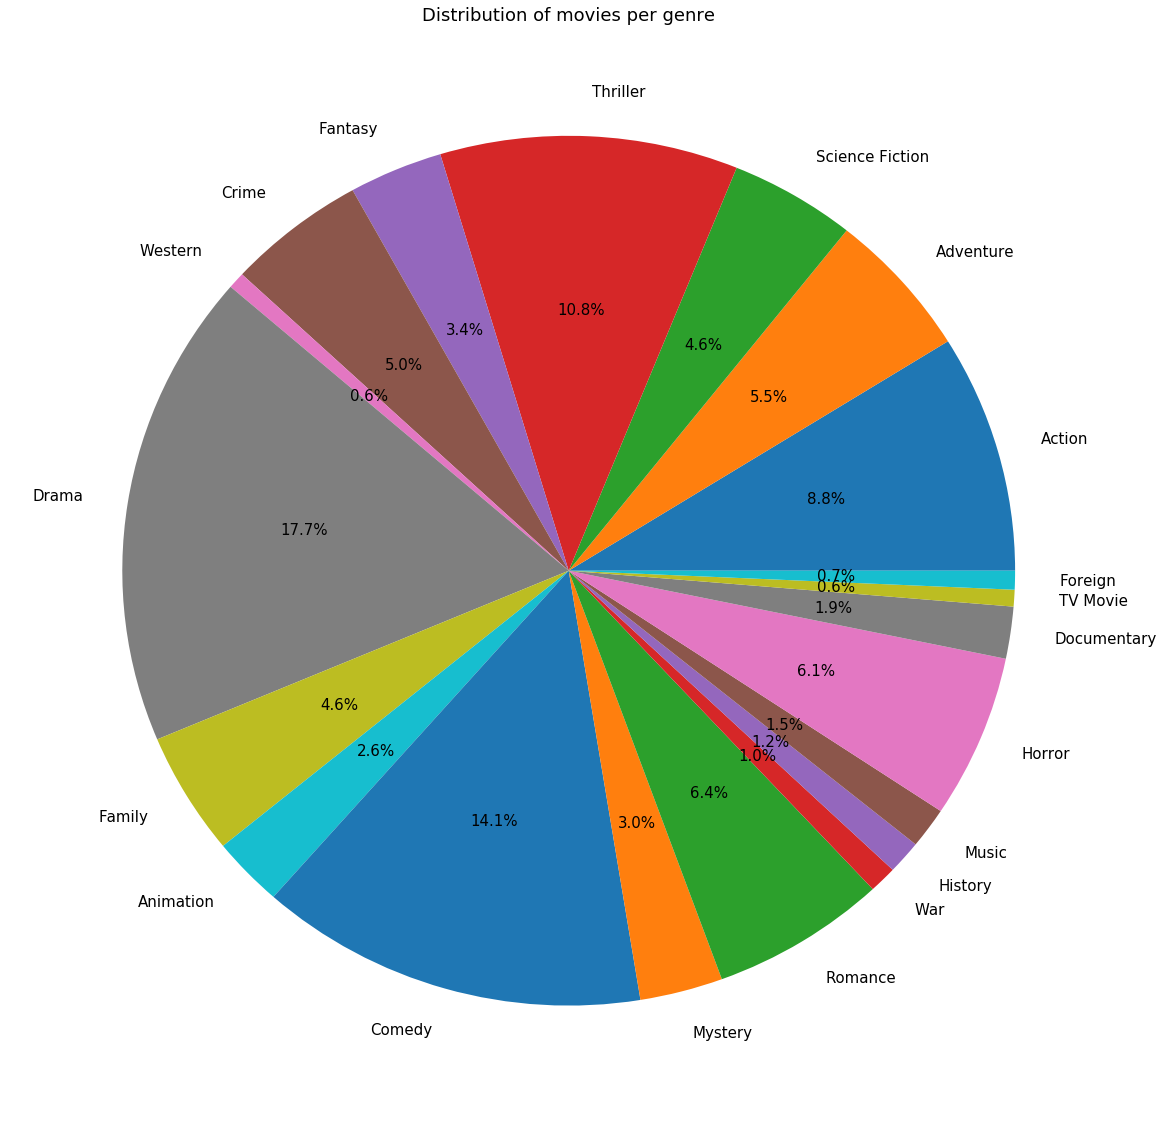

In [24]:
# Set size
x = len(dfMovieGenre['movies'])

plt.figure(figsize=[20, 20])
plt.rcParams['font.size'] = 15.0
plt.title('Distribution of movies per genre')
plt.pie(
    # using data 
    dfMovieGenre['movies'],
    # with the labels being 
    labels=dfMovieGenre['genre'],
    # with no shadows
    shadow=False,
   # with no slide exploded out
    explode=np.zeros(x, dtype=int),
    # with the start angle at 0%
    startangle=0,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
plt.show()

From above, we conclude that the genre with the greatest number of movies is 'Drama'. 
Now let's look at the popularity per genre: 

In [25]:
# Multiply the popularity rating by 1 or 0 to afffect each genre with the rating of the movies they associated with
for i in genre:
    movie_popularity[i] =  movie_popularity[i].multiply( movie_popularity['popularity'])
genre_popularity = movie_popularity[genre]
genre_popularity.head()

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,32.985763,32.985763,32.985763,32.985763,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.419936,28.419936,28.419936,28.419936,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,13.112507,13.112507,13.112507,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.173104,11.173104,11.173104,0.000000,11.173104,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.335014,0.000000,0.000000,9.335014,0.000000,9.335014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# We extract the mean popularity for each genre
genrePopMean = []
for i in genre:
    genrePopMean.append(genre_popularity[i].mean())
genrePopMean = np.array(genrePopMean)
genrePopMean
df_genrePopMean = pd.DataFrame({'genre':genre, 'mean_popularity':genrePopMean})
df_genrePopMean.head()

,genre,mean_popularity
0,Action,0.203674
1,Adventure,0.156605
2,Science Fiction,0.113531
3,Thriller,0.198831
4,Fantasy,0.083881


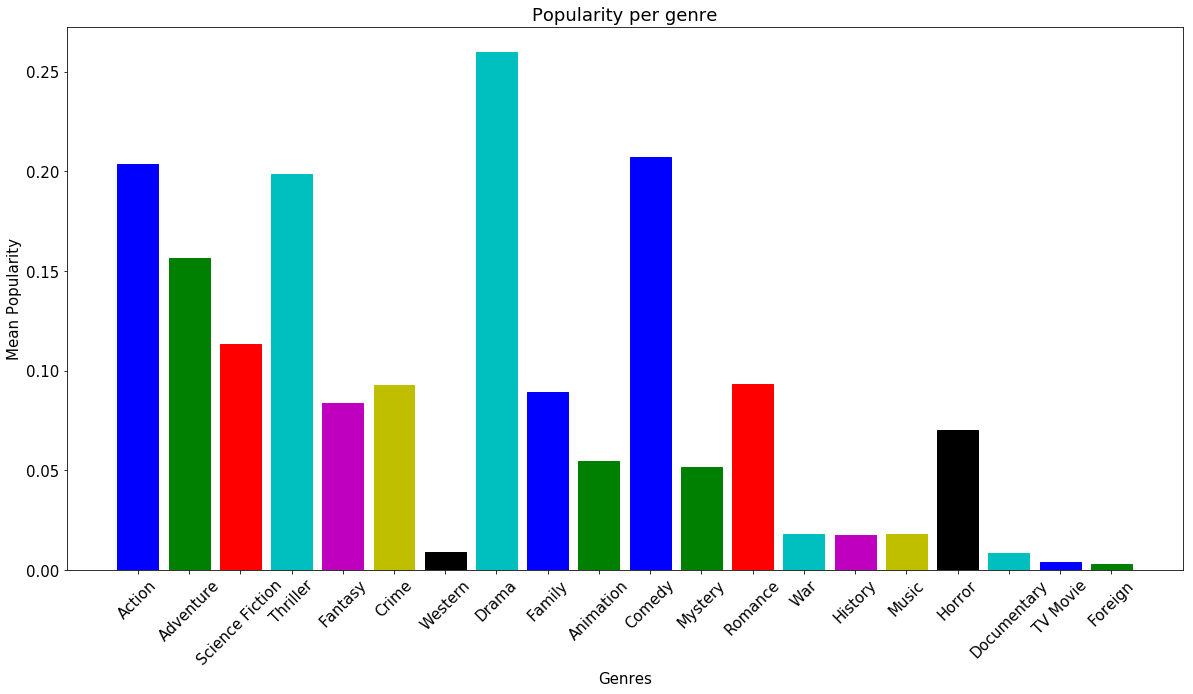

In [29]:
# We bar plot the mean popularity per genre
x = np.arange(20)
a = df_genrePopMean['genre']
b = df_genrePopMean['mean_popularity']
plt.figure(figsize=[20, 10])
plt.title('Popularity per genre')
plt.rcParams['font.size'] = 15.0
plt.xlabel('Genres')
plt.ylabel('Mean Popularity')
plt.xticks(x, a, rotation=45)
plot = plt.bar(x,  b)
colors = (('b', 'g', 'r', 'c', 'm', 'y', 'k', 'c','b','g')*2)
for i in range(20):
    plot[i].set_color(colors[i])

plt.show()

We can conclude that 'Drama' is the most popular genre. But would the most popular genre generate the highest profitability as well? 
Let's look at the mean profit per genre to see whether 'Drama' will still hold its position.

### Research Question 3:  What's the most profitable genre?

In [30]:
# We create a new dataframe holding the movies' data in relation with the question we want to answer
movie_profit = pd.DataFrame(df.loc[:,'original_title'])
movie_profit.head()

,original_title
0,Jurassic World
1,Mad Max: Fury Road
2,Insurgent
3,Star Wars: The Force Awakens
4,Furious 7


In [31]:
# We create a new column with the data about the profitability (Profit_adj = Revenue_adj -Budget_adj)
movie_profit['profit_adj'] = df.loc[:, 'revenue_adj'] - df.loc[:, 'budget_adj']
movie_profit.head()

,original_title,profit_adj
0,Jurassic World,1.254446e+09
1,Mad Max: Fury Road,2.101614e+08
2,Insurgent,1.704191e+08
3,Star Wars: The Force Awakens,1.718723e+09
4,Furious 7,1.210949e+09


In [32]:
# We then add the genres to the dataframe
movie_profit['genres'] = df.loc[:, 'genres']
movie_profit.head()

,original_title,profit_adj,genres
0,Jurassic World,1.254446e+09,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,2.101614e+08,Action|Adventure|Science Fiction|Thriller
2,Insurgent,1.704191e+08,Adventure|Science Fiction|Thriller
3,Star Wars: The Force Awakens,1.718723e+09,Action|Adventure|Science Fiction|Fantasy
4,Furious 7,1.210949e+09,Action|Crime|Thriller


In [33]:
# We will now join the individual genre to the dataframe
movie_profit = pd.concat([movie_profit, genre_df], axis=1, join_axes=[movie_profit.index])
movie_profit.head()

,original_title,profit_adj,genres,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,Jurassic World,1.254446e+09,Action|Adventure|Science Fiction|Thriller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mad Max: Fury Road,2.101614e+08,Action|Adventure|Science Fiction|Thriller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Insurgent,1.704191e+08,Adventure|Science Fiction|Thriller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Star Wars: The Force Awakens,1.718723e+09,Action|Adventure|Science Fiction|Fantasy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Furious 7,1.210949e+09,Action|Crime|Thriller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# We will set 1 for everytime a movie is listed in a  specific genre or 0 otherwise for each genre:
for i in genre:
    movie_profit[i] = movie_profit['genres'].str.contains(i).apply(lambda x: 1 if x else 0)
movie_profit.head()

,original_title,profit_adj,genres,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,Jurassic World,1.254446e+09,Action|Adventure|Science Fiction|Thriller,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mad Max: Fury Road,2.101614e+08,Action|Adventure|Science Fiction|Thriller,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Insurgent,1.704191e+08,Adventure|Science Fiction|Thriller,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Star Wars: The Force Awakens,1.718723e+09,Action|Adventure|Science Fiction|Fantasy,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Furious 7,1.210949e+09,Action|Crime|Thriller,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# We derive from movie_ptofit a detaframe containing the profits for each movie per genre
for i in genre:
    movie_profit[i] =  movie_profit[i].multiply( movie_profit['profit_adj'])
genre_profit = movie_profit[genre]
genre_profit.head()

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,1.254446e+09,1.254446e+09,1.254446e+09,1.254446e+09,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.101614e+08,2.101614e+08,2.101614e+08,2.101614e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000e+00,1.704191e+08,1.704191e+08,1.704191e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.718723e+09,1.718723e+09,1.718723e+09,0.000000e+00,1.718723e+09,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.210949e+09,0.000000e+00,0.000000e+00,1.210949e+09,0.000000e+00,1.210949e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# We extract the mean profit per genre
genreProfMean = []
for i in genre:
    genreProfMean.append(genre_profit[i].mean())
genreProfMean = np.array(genreProfMean)
df_genreProfMean = pd.DataFrame({'genre':genre, 'mean_profit':genreProfMean})
df_genreProfMean.head()

,genre,mean_profit
0,Action,1.292887e+07
1,Adventure,1.326069e+07
2,Science Fiction,6.512740e+06
3,Thriller,9.277930e+06
4,Fantasy,6.235494e+06


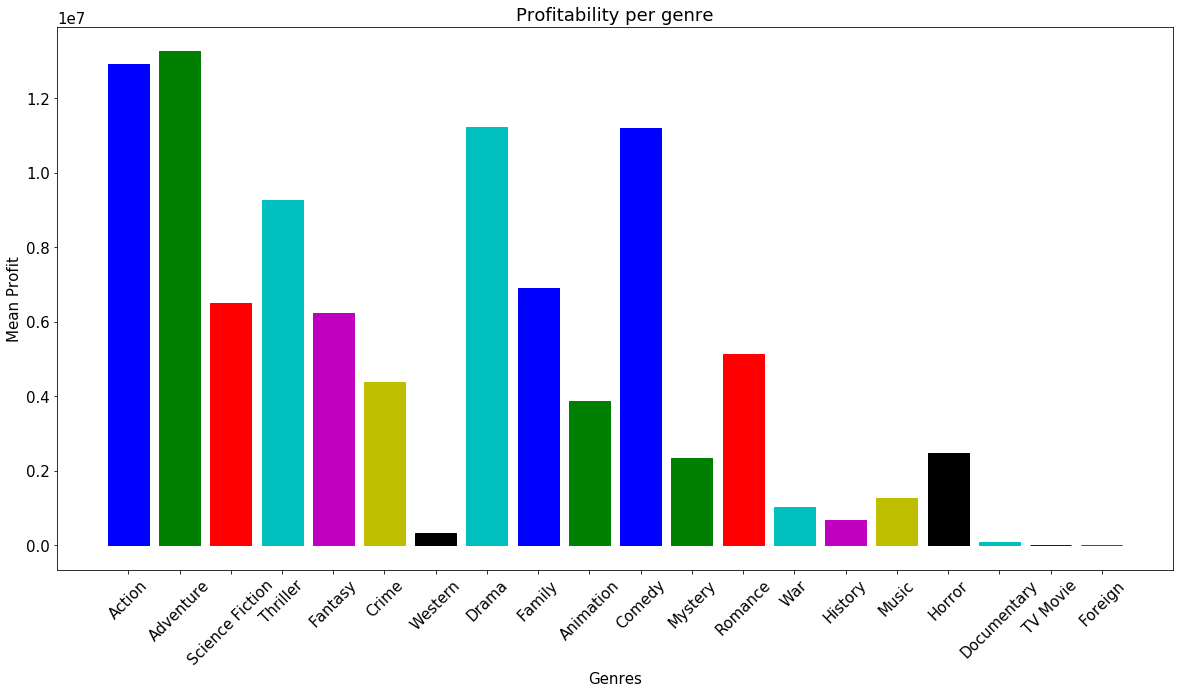

In [37]:
# We bar plot the mean profit per genre
x = np.arange(20)
a = df_genreProfMean['genre']
b = df_genreProfMean['mean_profit']
plt.figure(figsize=[20, 10])
plt.title('Profitability per genre')
plt.rcParams['font.size'] = 15.0
plt.xlabel('Genres')
plt.ylabel('Mean Profit')
plt.xticks(x, a, rotation=45)
plot = plt.bar(x,  b)
colors = (('b', 'g', 'r', 'c', 'm', 'y', 'k', 'c','b','g')*2)
for i in range(20):
    plot[i].set_color(colors[i])

plt.show()

From above 'Adventure' is the most profitable genre, then comes 'Action' and finally 'Drama' and 'Comedy' hold approximately the same position. So though 'Drama' doesn't hold the first position in term of profitability, it is still in the top 5 of the most profitable movies. 
In order to answer the third question of whether there is a relationship between a genre popularity and profitability, we will line plot them,  in order to look at the shape of their distributions. 
Prior to do so, we will first normalize the values of each variable in order to eliminate the effect of the difference of scale . 

### Research Question 3:  Is there a relationship between a genre popularity and profitability?

In [38]:
# Let's create a dataframe holding the values for both variables
both_var = pd.DataFrame({'mean_popularity':genrePopMean, 
                              'mean_profit':genreProfMean})
both_var.head()

,mean_popularity,mean_profit
0,0.203674,1.292887e+07
1,0.156605,1.326069e+07
2,0.113531,6.512740e+06
3,0.198831,9.277930e+06
4,0.083881,6.235494e+06


In [39]:
# We now normalize the values
x = both_var.values #returns a numpy array
min_max_scaler = prp.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
both_var_scaled = pd.DataFrame(columns=['mean_popularity', 
                                        'mean_profit'], 
                               data=x_scaled)
                                        
                               
both_var_scaled.head()

,mean_popularity,mean_profit
0,0.781516,0.974996
1,0.597915,1.000000
2,0.429895,0.491527
3,0.762623,0.699890
4,0.314242,0.470636


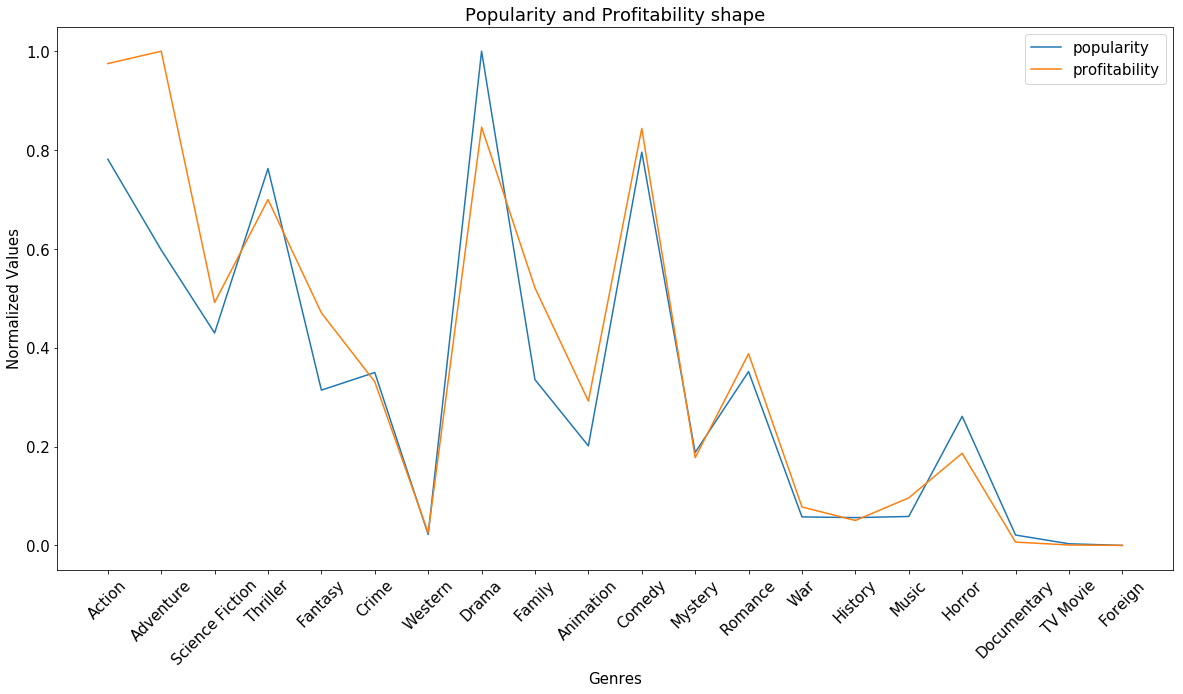

In [41]:
# We line plot the values
x = np.arange(20)
a = df_genreProfMean['genre']
popularity = both_var_scaled['mean_popularity']
profitability = both_var_scaled['mean_profit']
plt.figure(figsize=[20, 10])
plt.title('Popularity and Profitability shape')
plt.rcParams['font.size'] = 15.0
plt.xlabel('Genres')
plt.ylabel('Normalized Values')
plt.xticks(x, a, rotation=45)
p1 = plt.plot(x,  popularity)
p2 = plt.plot(x,  profitability)
plt.legend((p1[0], p2[0]), ('popularity', 'profitability'))
plt.show()

From the line plots we can observe that the variables' shapes are approximately similar, which leads to the assumption of a strong correlation between those variables. We will compute the correlation's value to have a numerical confirmation.  

In [42]:
# Let's take a look at the correlation between the 2 variables ('corr')
corr = both_var_scaled.corr(method='pearson')
corr

,mean_popularity,mean_profit
mean_popularity,1.000000,0.938597
mean_profit,0.938597,1.000000


As we can see there is a very strong correlation of approximately **94%** between the variables.

<a id='conclusions'></a>
## Conclusions

As we have seen, 'Drama' is the most popular genre, while 'Adventure' appears to be the most profitable one. We noticed as well a strong correlation between a genre's popularity and profitability, but as we know, "correlation does not imply causation". Therefore we do not have enough elements to conclude that popular genres are necessarily the most profitable. 
We might look at the relationship between the budget invested and the profitability generated per genre by making the assumpion that higher budget implies more talented resources, skills and materials to realize more profitable movies. 
However, another perspective could be to assume that higher budget is allocated to the genres with the higher popularity to generate the maximal profit which would lead us to look at the relationship between the budget and the popularity.  

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0